In [3]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plotter
import matplotlib
import time as datetime
%matplotlib inline

ping1000Lab.txt
                0
count  977.000000
mean     1.081548
std      5.998656
min      0.244000
25%      0.344000
50%      0.425000
75%      0.528000
max    175.000000
Median 	0.425000

ping1000Labff.txt
                0
count  979.000000
mean     0.964655
std      4.270306
min      0.229000
25%      0.328000
50%      0.388000
75%      0.525000
max    116.000000
Median 	0.388000



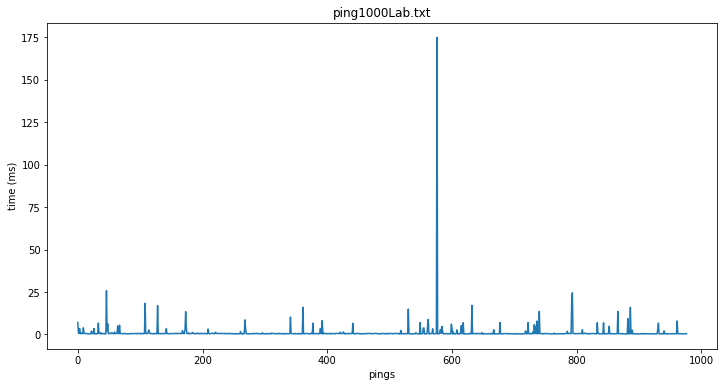

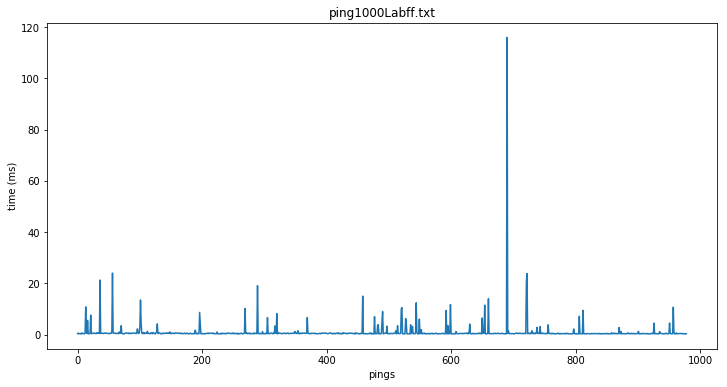

In [1]:
filenames = ["ping1000Lab.txt","ping1000Labff.txt"]
for filename in filenames:
    with open(filename) as f:
        inFile=f.read();

    data = re.compile(".*time=(\d+.\d+) ms\n").findall(inFile)
    data = list(map(float,data))
    
    # (b)  What  was  the  minimum,  maximum,  mean,  and  median  latency  of  the  pings  that  succeeded?  Ignore  pings  that failed in the calculation. 
    data  = pd.DataFrame(data);
    # rtt min/avg/max/mdev = 0.244/1.083/175.827/6.021 ms
    print (filename); print(data.describe())
    print ("Median \t%f" % data.median())    
    # (c) Plot graphs to visualize the normal distribution of the ping latencies. The goal here is to find a method to present the data in a way that is clear and easy to understand. 
    plotter.figure(figsize=(12,6))
    plotter.title(filename)
    plotter.xlabel("pings")
    plotter.ylabel("time (ms)")
    plotter.plot(data)
    print()

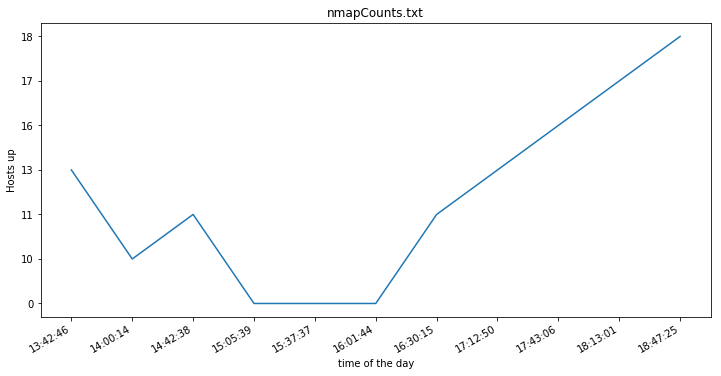

In [2]:

filename="nmapCounts.txt"
with open(filename) as f:
    inFile=f.read();

    data = re.compile(".* (\d\d:\d\d:\d\d) .*, (\d+)").findall(inFile)
#     times = [datetime.strptime(entry[0],'%H:%M:%S') for entry in data]
    times = [entry[0] for entry in data]
    values = [entry[1] for entry in data]
    
    plotter.figure(figsize=(12,6))
    plotter.title(filename)
    plotter.xlabel("time of the day")
    plotter.ylabel("Hosts up")
    plotter.gcf().autofmt_xdate()
    plotter.plot(times,values)
# Data -     
# Wed Jan 31 13:42:46 IST 2018, 13
# Wed Jan 31 14:00:14 IST 2018, 10
# Wed Jan 31 14:42:38 IST 2018, 11
# Wed Jan 31 15:05:39 IST 2018, 0
# Wed Jan 31 15:37:37 IST 2018, 0
# Wed Jan 31 16:01:44 IST 2018, 0
# Wed Jan 31 16:30:15 IST 2018, 11
# Wed Jan 31 17:12:50 IST 2018, 13
# Wed Jan 31 17:43:06 IST 2018, 16
# Wed Jan 31 18:13:01 IST 2018, 17
# Wed Jan 31 18:47:25 IST 2018, 18

['19:0', '19:3', '21:0'] [225.851, 265.753, 249.281]
['19:0', '19:3', '21:0'] [229.318, 228.353, 245.05]
['19:0', '19:3', '21:0'] [227.336, 240.507, 248.424]
['19:0', '19:3', '21:0'] [271.745, 249.388, 235.527]
['19:0', '19:3', '21:0'] [238.267, 293.257, 245.987]
['19:0', '19:3', '21:0'] [357.789, 305.105, 338.867]


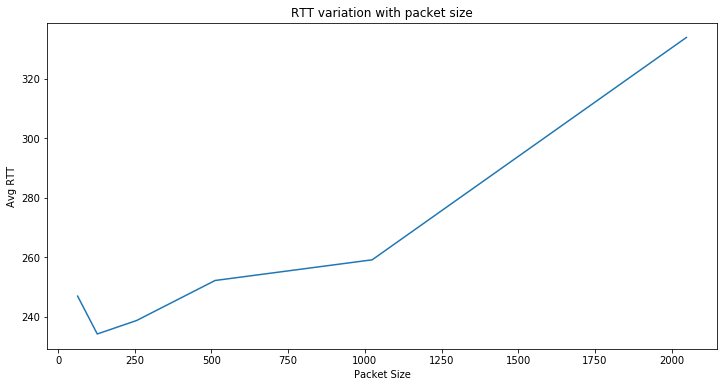

In [49]:
prefix="Q2/ping_ubuntu.com_"
plotData=[]
sizes=[64,128,256,512,1024,2048]

# 21:03:35 IST 2018
for size in sizes:
    filename = prefix+str(size)+".txt"
    with open(filename) as f:
        inFile = f.read();
    data = re.compile(".*mdev = [\d\.]+\/([\d\.]+)\/").findall(inFile)
    times = re.compile(".* (\d+:\d+:\d+) IST 2018.*").findall(inFile)
    times = [ t[0:4] for t in times]
    data = list(map(float,data))
    plotter.gcf().autofmt_xdate()
    plotter.plot(times,data)
    plotData.append(np.mean(data))
    
plotter.figure(figsize=(12,6))
plotter.title("RTT variation with packet size")
plotter.xlabel("Packet Size")
plotter.ylabel("Avg RTT")
plotter.plot(sizes,plotData)

Host \ Time	 ['19:07:27', '19:37:22', '21:07:26']
ubuntu.com	 [30, 30, 30]
steampowered.com	 [7, 7, 7]
cricbuzz.com	 [13, 13, 13]
billboard.com	 [13, 13, 13]
uefa.com	 [30, 30, 30]


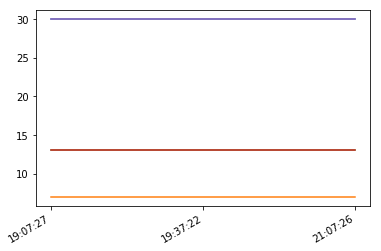

In [46]:
filename="Q6/trCounts.txt"
with open(filename) as f:
    inFile = f.read();
times = re.compile("Appending traceroute counts.* (\d+:\d+:\d+) IST 2018.*").findall(inFile)
print("Host \ Time\t",times)

hosts=["ubuntu.com", "steampowered.com", "cricbuzz.com", "billboard.com", "uefa.com"]
for host in hosts:
    data = re.compile(host+", (\d+)").findall(inFile)
    data = list(map(int,data))
    plotter.gcf().autofmt_xdate()
    plotter.plot(times,data)
    print(host+"\t",data)
